In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
master = pd.ExcelFile("CONTE_TWIN_CT_SA_tlaplace_Master.xlsx") 

In [3]:
master.sheet_names

[u'ROIs',
 u'1_2_CONTE_CT_tlaplace_dROI',
 u'1_2_CONTE_SA_dROI',
 u'1_2_CONTE_TotalCT_SA',
 u'1_2_TWIN_CT_tlaplace_dROI',
 u'1_2_TWIN_SA_dROI',
 u'1_2_TWIN_TotalCT_SA',
 u'4_6_CONTE_CT_tlaplace_dROI',
 u'4_6_CONTE_SA_dROI',
 u'4_6_CONTE_TotalCT_SA',
 u'4_6_TWIN_CT_tlaplace_dROI',
 u'4_6_TWIN_SA_dROI',
 u'4_6_TWIN_TotalCT_SA']

In [4]:
ct1_2y = master.parse('1_2_CONTE_SA_dROI')
#ct1_2_twin = master.parse('1_2_TWIN_CT_tlaplace_dROI')
ct4_6y = master.parse('4_6_CONTE_SA_dROI')
#ct4_6_twin = master.parse('4_6_TWIN_CT_tlaplace_dROI')

In [5]:
ct1_2y.rename(columns={'ROI':'SubjectId'},inplace=True)
ct4_6y.rename(columns={'ROI':'SubjectId'},inplace=True)

# There is probably a better way to add the age column to each record based off the recordId
ct1y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("1year"),:]
ones = pd.DataFrame(data=[1] * ct1y.shape[0], columns=["Age"])
ct1y = pd.concat([ct1y, ones] ,axis=1).dropna()
     
ct2y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("2year"),:]
twos = pd.DataFrame(data=[2] * ct2y.shape[0], columns=["Age"])
ct2y = pd.concat([ct2y, twos] ,axis=1).dropna()

ct4y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("4year"),:]
fours = pd.DataFrame(data=[4] * ct4y.shape[0], columns=["Age"])
ct4y = pd.concat([ct4y, fours] ,axis=1).dropna()

ct6y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("6year"),:]
sixes = pd.DataFrame(data=[6] * ct6y.shape[0], columns=["Age"])
ct6y = pd.concat([ct6y, sixes] ,axis=1).dropna()

# Combine dataframe
ctdf = pd.concat([ct1y, ct2y, ct4y, ct6y], axis=0)
ctdf.head()

,SubjectId,11101,11102,11103,11104,11105,11106,11107,11108,11109,...,12167,12168,12169,12170,12171,12172,12173,12174,12175,Age
1,neo-0011-2-1-1year,299.97601,591.75110,497.18735,514.04675,270.53149,656.84528,381.03351,274.42783,175.69710,...,115.376320,429.81177,330.17981,221.88707,44.941055,230.89848,41.547768,1273.23910,32.992874,1.0
3,neo-0012-2-1-1year,238.92955,613.24261,500.49023,439.55450,379.13968,599.59119,392.22531,240.28519,170.68494,...,115.240910,486.06995,227.50719,228.42152,66.139252,152.03813,59.377483,777.57098,20.986979,1.0
7,neo-0019-2-1-1year,218.49388,633.55438,562.04865,440.43262,433.83707,559.68494,277.40070,411.30054,137.53398,...,112.276270,519.39539,199.00060,188.60394,76.365936,154.94850,66.755302,1133.86080,67.217674,1.0
11,neo-0029-3-1year,245.53627,442.65335,520.29553,429.36664,296.35367,476.43927,313.50671,385.72635,139.56056,...,103.594520,301.49490,150.89336,179.74065,59.802357,160.72775,45.230240,1041.72500,57.045643,1.0
13,neo-0034-1-1year,285.61850,519.06677,448.85825,490.20691,320.10614,517.26227,400.86334,369.36630,172.00914,...,79.894485,480.72830,212.05399,120.55075,45.173634,181.28125,84.282120,977.11884,79.418633,1.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# standardize values for PCA
x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
x = StandardScaler().fit_transform(x)
x.shape

features = ctdf.drop(['SubjectId', 'Age'], axis=1)

In [8]:
pca = PCA(n_components=150)
pca.fit(x)

pca

PCA(copy=True, n_components=150, whiten=False)

In [9]:
pcs = []
for i in range(1,151):
    pcs.append('PC' + str(i))
principalComponentDf = pd.DataFrame(data = np.transpose(pca.components_), columns = pcs)
columnNames = pd.DataFrame(data = ctdf.columns.values.tolist()[1:], columns = ['ROI'])
principalComponentDf = pd.concat([columnNames, principalComponentDf], axis=1)
# why does the dataframe have 151 rows?
principalComponentDf.head()

,ROI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,11101,0.087177,-0.001359,-0.067919,0.001885,-0.070933,0.047843,-0.101336,0.019058,-0.014554,...,0.081765,-0.006938,-0.090645,0.020950,0.026811,-0.046805,-0.022442,0.021666,-0.017375,0.046526
1,11102,0.044863,-0.194123,0.056161,-0.123904,-0.053376,-0.156252,-0.011688,0.007582,0.012581,...,0.017719,0.046928,-0.048045,-0.090805,0.022491,-0.077600,-0.010952,0.006614,-0.007537,0.029488
2,11103,0.062088,-0.012371,-0.033689,0.077485,0.151648,-0.040312,-0.003375,-0.004658,-0.049370,...,0.010223,-0.058700,0.007579,0.077341,-0.015954,0.034359,-0.040854,0.014447,-0.050317,0.011455
3,11104,0.089398,-0.024880,0.075328,0.095771,0.034217,-0.088720,-0.051957,0.121927,0.028594,...,0.045786,0.085389,-0.061253,-0.009594,0.183066,0.050347,-0.074044,0.029113,-0.017522,-0.028033
4,11105,0.076492,-0.008157,-0.059735,-0.030800,-0.012275,-0.056440,0.050939,0.062518,0.030183,...,0.009797,0.013357,0.024820,-0.027093,-0.013147,0.048892,-0.041224,0.011694,-0.057953,0.024992


Text(0.5,0,'Principal Component')

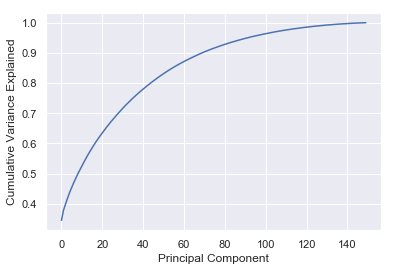

In [10]:
cumVar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumVar)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Principal Component")

In [11]:
# Keep only the principal components that cumulatively explain at 90% of the variance
imptPCs = pcs[:len(cumVar[cumVar <= .9])]
principalComponentDf = principalComponentDf.loc[:, imptPCs]
#principalComponentDf.head()

In [12]:
# For visualization keep 2 principal components
print(pca.explained_variance_ratio_[0:2]) #variance explained by first two PCs

#x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
firstTwoPCs = pd.DataFrame(data = pca.components_[:,:2], columns = ['PC1', 'PC2'])
pcScores = pd.DataFrame(data = np.dot(x, firstTwoPCs), columns = ['PC1', 'PC2'])
ages = ctdf.loc[:,['Age']].reset_index()
pcScores = pd.concat([pcScores,ages['Age']], axis = 1)
pcScores.head()


[0.34500322 0.03381428]


,PC1,PC2,Age
0,0.077373,0.451237,1.0
1,0.941341,0.860585,1.0
2,1.156737,1.011444,1.0
3,1.935411,2.098754,1.0
4,0.432224,1.722221,1.0


C:\Users\mattbeze\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


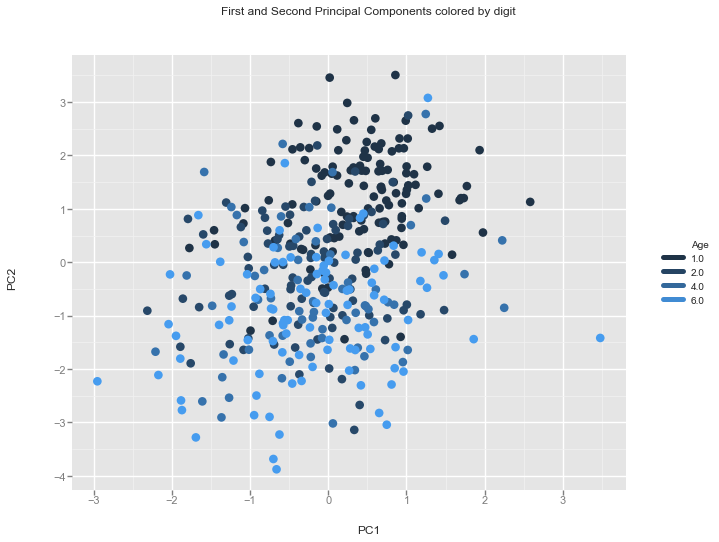

<ggplot: (20614723)>

In [13]:
from ggplot import * 
#from ggplot import scale_fill_brewer

chart = ggplot( pcScores, aes(x='PC1', y='PC2', color='Age') ) \
        + geom_point(size=75,alpha=1) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [14]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 568.067805
[t-SNE] Error after 100 iterations with early exaggeration: 1.108327
[t-SNE] Error after 175 iterations: 1.262978
t-SNE done! Time elapsed: 7.78299999237 seconds


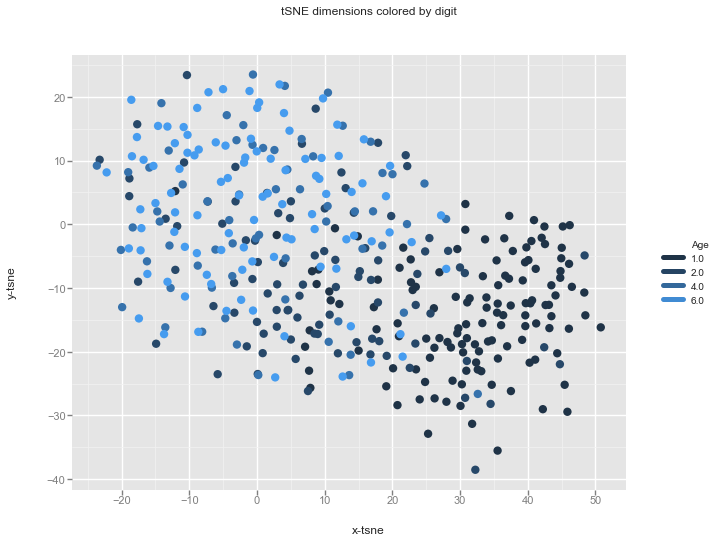

<ggplot: (26997305)>

In [15]:
df_tsne = ctdf.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='Age') ) \
        + geom_point(size=70,alpha=1.0,) \
        + ggtitle("tSNE dimensions colored by digit")
chart